In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('83.csv')

In [3]:
data

,Nama,Raport
0,ADELVIN VEREN SHAHIA,90
1,AFIFAH ANNISA RINALDI KABAN,75
2,ALEXA XADIYA XAVIERA,74
3,ALMIRA NASYWA BILBINA,83
4,ANGGITA ABIGAEL HUTAPEA,94
5,APRIYANI,69
6,ARDIANSYAH NOVAL PRATAMA,78
7,BELINDA NAURA SIREGAR,78
8,CELSA ZASKYA ANINDA,83
9,CUT NYAK ISARURA NADHFASYA,79


In [4]:
X = data[['Raport']]

In [5]:
wcss = []
for i in range(1, 7):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(kmeans.inertia_)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

In [6]:
wcss

[1504.769230769231,
 461.96296296296293,
 238.86666666666667,
 132.0888888888889,
 53.51746031746031,
 37.317460317460316]

Text(0, 0.5, 'WCSS')

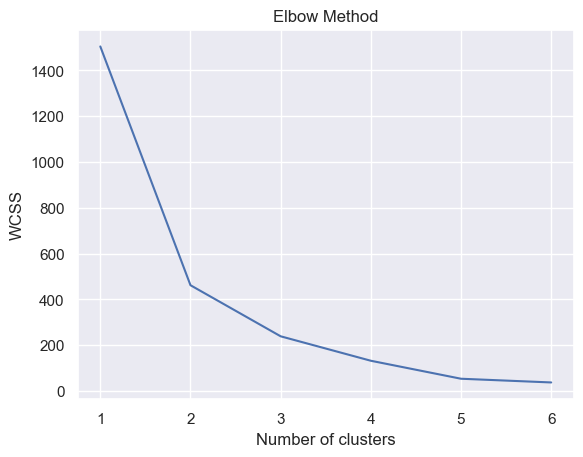

In [7]:
number_cluster = range(1,7)
plt.plot(number_cluster, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [8]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
data['cluster'] = y_kmeans

In [10]:
cluster_means = data.groupby('cluster')['Raport'].mean().sort_values()

In [11]:
data['keterangan'] = cluster_labels = {
    cluster_means.index[0]: 'Kurang Memahami', 
    cluster_means.index[1]: 'Cukup Memahami', 
    cluster_means.index[2]: 'Baik', 
    cluster_means.index[3]: 'Sangat Memahami'
}

In [12]:
data['keterangan'] = data['cluster'].map(cluster_labels)

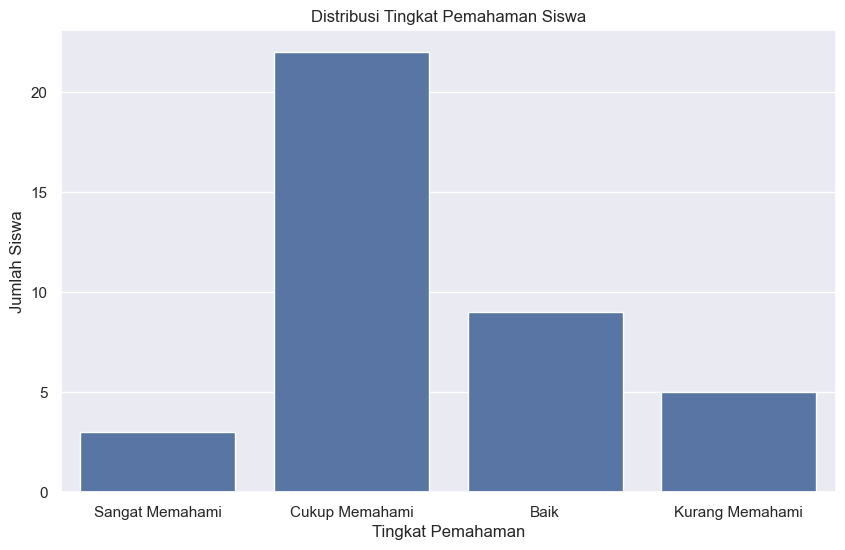

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='keterangan', data=data)
plt.title('Distribusi Tingkat Pemahaman Siswa')
plt.xlabel('Tingkat Pemahaman')
plt.ylabel('Jumlah Siswa')
plt.show()